In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
#pyo.init_notebook_mode()

In [2]:
apps = pd.read_csv('data_cleaned.csv')

In [3]:
rev = pd.read_csv(r'C:\Users\User\Desktop\Università\BigDataAnalytics\ProgettoBDA\datasets\googleplaystore_user_reviews.csv')
rev['App'] = rev['App'].str.upper()

In [4]:
rev.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [5]:
apps['Rating'].value_counts()

4.3    895
4.4    894
4.5    851
4.2    812
4.6    684
4.1    623
4.0    513
4.7    439
3.9    359
3.8    286
5.0    271
3.7    224
4.8    220
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     63
2.9     45
2.8     40
2.7     23
2.6     23
2.3     20
2.5     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     12
1.8      8
2.1      8
1.7      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

In [6]:
#remove the single record with Rating = 1.2 because the split into train and test doesn't support an y_class with only 1 record
apps = apps[apps['Rating'] != 1.2].reset_index(drop = True)

In [7]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Rating            8196 non-null   float64
 2   Reviews           8196 non-null   int64  
 3   Size              8196 non-null   float64
 4   Installs          8196 non-null   object 
 5   Price             8196 non-null   float64
 6   Content Rating    8196 non-null   object 
 7   Last Updated      8196 non-null   object 
 8   Current Ver       8196 non-null   object 
 9   Android Ver       8196 non-null   object 
 10  Main_Genres       8196 non-null   object 
 11  Secondary_Genres  8196 non-null   object 
 12  Is_Family         8196 non-null   int64  
 13  Is_Game           8196 non-null   int64  
 14  Compatibility     8196 non-null   object 
 15  RTR               8196 non-null   float64
 16  Both_Stores       8196 non-null   int64  


In [8]:
#compute Sentiment Polarity Mean per app
rev['SentimentPolarityMean'] = rev.groupby(['App'])['Sentiment_Polarity'].transform(lambda x: x.mean())

In [9]:
rev = rev.sort_values(by=['App', 'SentimentPolarityMean'], ascending=False)

In [10]:
#merge the two datasets with a left join to maintain apps in the Google Play Store
apps = pd.merge(apps, rev[['App', 'SentimentPolarityMean']], on = 'App', how = 'left')

In [11]:
#substitute missing values with 999 to preserve the type numeric of the variable
apps['SentimentPolarityMean'].fillna(999, inplace = True)

In [12]:
apps = apps.drop(columns = 'App')   #app name is not relevant as feature, because such an ID

In [13]:
apps['Last Updated']

0       14-07-2018
1       21-10-2017
2       24-07-2018
3       11-03-2018
4       17-11-2017
           ...    
8191    06-07-2018
8192    03-07-2018
8193    16-09-2014
8194    13-07-2018
8195    02-08-2018
Name: Last Updated, Length: 8196, dtype: object

In [14]:
#split Last Updated into Year, Month and Day
apps['YearUpdated'], apps['MonthUpdated'], apps['DayUpdated'] = pd.to_datetime(apps['Last Updated']).dt.year, pd.to_datetime(apps['Last Updated']).dt.month, pd.to_datetime(apps['Last Updated']).dt.day

In [15]:
apps = apps.drop(columns = 'Last Updated') #app name is redundant

In [16]:
categorical_attrs = ['Installs', 'Content Rating', 'Current Ver', 'Android Ver', 'Main_Genres',
       'Secondary_Genres', 'Compatibility']
numerical_attrs = ['Reviews', 'Size', 'Price', 'SentimentPolarityMean']

In [17]:
#scale numerical attributes in order to have a range [0,1]
scaler = MinMaxScaler()
scaler.fit(apps[numerical_attrs])
apps[numerical_attrs] = scaler.transform(apps[numerical_attrs])

# Label Encoding for categorical attributes

In [18]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [19]:
apps.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Current Ver', 'Android Ver', 'Main_Genres', 'Secondary_Genres',
       'Is_Family', 'Is_Game', 'Compatibility', 'RTR', 'Both_Stores',
       'SentimentPolarityMean', 'YearUpdated', 'MonthUpdated', 'DayUpdated'],
      dtype='object')

In [20]:
#encode categorical attributes to deal with it
apps[categorical_attrs] = apps[categorical_attrs].apply(LabelEncoder().fit_transform)

In [21]:
#divide dependent and independent variables
class_name = 'Rating'
attributes = [col for col in apps.columns if col != class_name]
X = apps[attributes].values
y = apps[class_name]

In [22]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
y_dummies = np_utils.to_categorical(y)

In [23]:
y_dummies

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8195
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 8196 non-null   float64
 1   Reviews                8196 non-null   float64
 2   Size                   8196 non-null   float64
 3   Installs               8196 non-null   int32  
 4   Price                  8196 non-null   float64
 5   Content Rating         8196 non-null   int32  
 6   Current Ver            8196 non-null   int32  
 7   Android Ver            8196 non-null   int32  
 8   Main_Genres            8196 non-null   int32  
 9   Secondary_Genres       8196 non-null   int32  
 10  Is_Family              8196 non-null   int64  
 11  Is_Game                8196 non-null   int64  
 12  Compatibility          8196 non-null   int32  
 13  RTR                    8196 non-null   float64
 14  Both_Stores            8196 non-null   int64  
 15  Sent

# Splitting in training and test sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dummies, test_size=0.3, random_state=42, stratify=y)

In [28]:
X_train.shape, y_train.shape

((5737, 18), (5737, 38))

In [29]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Features selection

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [31]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_tr, y_tr)
# transform train input data
X_train_fs = fs.transform(X_tr)
# transform test input data
X_test_fs = fs.transform(X_ts)

In [32]:
X_train_fs.shape, X_test_fs.shape

((5737, 18), (2459, 18))

Feature 0: 1.440852
Feature 1: 1.439053
Feature 2: 5.820666
Feature 3: 0.865673
Feature 4: 1.435099
Feature 5: 7.101110
Feature 6: 2.458660
Feature 7: 1.370264
Feature 8: 1.547914
Feature 9: 1.138837
Feature 10: 2.034049
Feature 11: 2.572965
Feature 12: 16.636340
Feature 13: 2.417239
Feature 14: 1.926064
Feature 15: 4.589152
Feature 16: 1.170595
Feature 17: 0.999563


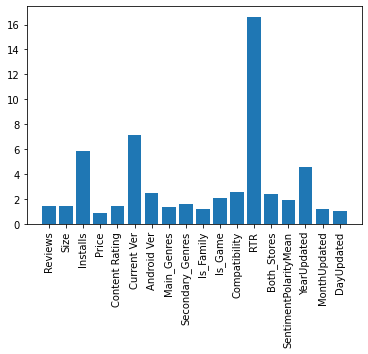

In [33]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(len(fs.scores_)),apps.columns[1:], rotation=90)
plt.show()

In [34]:
#drop attributes with f-score < 1.0
apps_red = apps.drop(columns = ['Price', 'DayUpdated'])

In [35]:
apps_red.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Content Rating',
       'Current Ver', 'Android Ver', 'Main_Genres', 'Secondary_Genres',
       'Is_Family', 'Is_Game', 'Compatibility', 'RTR', 'Both_Stores',
       'SentimentPolarityMean', 'YearUpdated', 'MonthUpdated'],
      dtype='object')

In [36]:
class_name = 'Rating'
attributes = [col for col in apps_red.columns if col != class_name]
X_red = apps_red[attributes].values
y_red = apps_red[class_name]

In [37]:
# encode class values as integers
encoder_red = LabelEncoder()
encoder_red.fit(y_red)
y_red = encoder_red.transform(y_red)

# convert integers to dummy variables (i.e. one hot encoded)
y_dumm_red = np_utils.to_categorical(y_red)

In [38]:
np.unique(y_red)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [39]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_dumm_red, test_size=0.3, random_state=42, stratify=y_dumm_red)

In [40]:
n_features_red = X_train_red.shape[1]
n_train_example_red = X_train_red.shape[0]
n_test_example_red = X_test_red.shape[0]

In [41]:
print('Number of features: ', n_features_red)
print('Number of train example: ', n_train_example_red)
print('Number of test example: ', n_test_example_red)

Number of features:  16
Number of train example:  5737
Number of test example:  2459


# Model_1

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from scipy.stats import pearsonr, ks_2samp
from keras.models import Sequential
from keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from keras.layers import merge
from keras.layers.merge import concatenate
from keras import Model
from keras.optimizers import SGD
import pydot
from keras.utils.vis_utils import plot_model

In [43]:
cat_df = apps_red[['Rating', 'Secondary_Genres', 'Main_Genres', 'Current Ver', 'Android Ver',
                   'Is_Family', 'Is_Game', 'Both_Stores', 'Content Rating']]
ord_df = apps_red[['Rating', 'Installs', 'Compatibility', 'YearUpdated', 'MonthUpdated']]
num_df = apps_red[['Rating', 'RTR', 'Size', 'Reviews', 'SentimentPolarityMean']]

In [44]:
class_name = 'Rating'
attributes = [col for col in ord_df.columns if col != class_name]
X_ord = ord_df[attributes].values
y_ord = ord_df[class_name]

In [45]:
# encode class values as integers
encoder_ord = LabelEncoder()
encoder_ord.fit(y_ord)
y_ord = encoder_ord.transform(y_ord)

# convert integers to dummy variables (i.e. one hot encoded)
y_dumm_ord = np_utils.to_categorical(y_ord)

In [46]:
np.unique(y_ord)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37], dtype=int64)

In [47]:
Xord_train, Xord_test, yord_train, yord_test = train_test_split(X_ord, y_dumm_ord, test_size=0.3, random_state=42, stratify=y_dumm_ord)

In [48]:
n_features_ord = Xord_train.shape[1]
n_train_example_ord = Xord_train.shape[0]
n_test_example_ord = Xord_test.shape[0]

In [49]:
print('Number of features: ', n_features_ord)
print('Number of train example: ', n_train_example_ord)
print('Number of test example: ', n_test_example_ord)

Number of features:  4
Number of train example:  5737
Number of test example:  2459


In [50]:
class_name = 'Rating'
attributes = [col for col in cat_df.columns if col != class_name]
X_cat = cat_df[attributes].values
y_cat = cat_df[class_name]

In [51]:
# encode class values as integers
encoder_cat = LabelEncoder()
encoder_cat.fit(y_cat)
y_cat = encoder_cat.transform(y_cat)

# convert integers to dummy variables (i.e. one hot encoded)
y_dumm_cat = np_utils.to_categorical(y_cat)

In [52]:
Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(X_cat, y_dumm_cat, test_size=0.3, random_state=42, stratify=y_dumm_cat)

In [53]:
n_features_cat = Xcat_train.shape[1]
n_train_example_cat = Xcat_train.shape[0]
n_test_example_cat = Xcat_test.shape[0]

In [54]:
print('Number of features: ', n_features_cat)
print('Number of train example: ', n_train_example_cat)
print('Number of test example: ', n_test_example_cat)

Number of features:  8
Number of train example:  5737
Number of test example:  2459


In [55]:
class_name = 'Rating'
attributes = [col for col in num_df.columns if col != class_name]
X_num = num_df[attributes].values
y_num = num_df[class_name]

In [56]:
# encode class values as integers
encoder_num = LabelEncoder()
encoder_num.fit(y_num)
y_num = encoder_num.transform(y_num)

# convert integers to dummy variables (i.e. one hot encoded)
y_dumm_num = np_utils.to_categorical(y_num)

In [57]:
Xnum_train, Xnum_test, ynum_train, ynum_test = train_test_split(X_num, y_dumm_num, test_size=0.3, random_state=42, stratify=y_dumm_num)

In [58]:
n_features_num = Xnum_train.shape[1]
n_train_example_num = Xnum_train.shape[0]
n_test_example_num = Xnum_test.shape[0]

In [59]:
print('Number of features: ', n_features_num)
print('Number of train example: ', n_train_example_num)
print('Number of test example: ', n_test_example_num)

Number of features:  4
Number of train example:  5737
Number of test example:  2459


In [60]:
#set input layers for NN
input_ord = Input(shape=(n_features_ord,1))
input_cat = Input(shape=(n_features_cat,1))
input_num = Input(shape=(n_features_num,1))

In [61]:
input_ord.shape, input_cat.shape, input_num.shape

(TensorShape([None, 4, 1]),
 TensorShape([None, 8, 1]),
 TensorShape([None, 4, 1]))

In [62]:
#the first branch
nn1 = Dense(512, activation='relu', kernel_initializer = 'he_uniform')(input_ord)
nn1 = Dense(256, activation='tanh')(nn1)
nn1 = Dense(128, activation='tanh')(nn1)
nn1 = Dense(64, activation='tanh')(nn1)
flat1 = Flatten()(nn1)
x_ord = Model(inputs=input_ord, outputs=flat1)

#the second branch
nn2 = Dense(128, activation='relu', kernel_initializer = 'he_uniform')(input_cat)
nn2 = Dense(64, activation='tanh')(nn2)
nn2 = Dense(32, activation='tanh')(nn2)
nn2 = Dense(16, activation='tanh')(nn2)
flat2 = Flatten()(nn2)
x_cat = Model(inputs=input_cat, outputs=flat2)

#the third branch
conv3 = Conv1D(64, kernel_size=4, activation='tanh', padding = "same")(input_num)
#batch2 = BatchNormalization()(conv2)
#conv3 = Conv1D(16, kernel_size=3, activation='tanh', padding = "same")(conv3)
batch3 = BatchNormalization()(conv3)
#pool3 = MaxPool1D()(batch3)
flat3 = Flatten()(batch3)
#dense3 = Dense(32, activation = 'tanh')(flat3)
x_num = Model(inputs=input_num, outputs=flat3)

# combine the output of the three branches
merge = concatenate([flat1, flat2, flat3])

In [63]:
flat1.shape, flat2.shape, flat3.shape

(TensorShape([None, 256]), TensorShape([None, 128]), TensorShape([None, 256]))

In [64]:
# apply a FC layer and then a prediction on the
# combined outputs
#z = Dense(76, activation = "tanh")(merge)
z = Dense(y_train.shape[1], activation = "softmax")(merge)

# our model will accept the inputs of the three branches and
# then output a single value
model1 = Model(inputs=[x_ord.input, x_cat.input, x_num.input], outputs=z)

In [65]:
print(model1.summary())

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 8, 1)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 4, 512)       1024        input_1[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 8, 128)       256         input_2[0][0]                    
_______________________________________________________________________________________

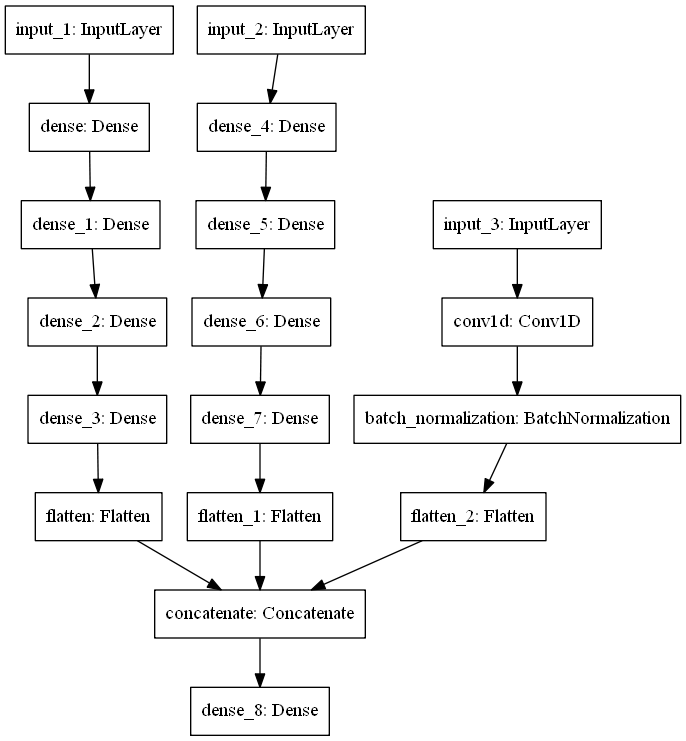

In [66]:
plot_model(model1, to_file='model1.png')

In [67]:
model1.compile(optimizer='adam', metrics = ['accuracy'], loss=['categorical_crossentropy'])

In [ ]:
history1 = model1.fit([Xord_train, Xcat_train, Xnum_train], y_train_red, validation_split = 0.2, epochs = 250, batch_size = 50)

In [ ]:
y_pred1= np.argmax(model1.predict([Xord_test, Xcat_test, Xnum_test]), axis = 1)
y_pred1_train = np.argmax(model1.predict([Xord_train, Xcat_train, Xnum_train]), axis = 1)

In [ ]:
y_test_red

In [ ]:
y_test_red = [np.argmax(y, axis = None) for y in y_test_red]
y_test_red = encoder.inverse_transform(np.array(y_test_red).ravel())

y_pred1 = encoder_red.inverse_transform(y_pred1)

In [ ]:
y_test

In [ ]:
print('r on test %s' % pearsonr(y_test_red, y_pred1)[0])
print('KS on test %s' % ks_2samp(y_test_red, y_pred1)[0])
print('\n')
print('RMSE test %s' % sqrt(mse(y_test_red, y_pred1)))
print('MAE test %s' % mae(y_test_red, y_pred1))

In [ ]:
df1 = pd.DataFrame()

df1['RatingPredict'] = pd.Series(y_pred1)

df1['RatingActual'] = pd.Series(y_test_red)


plt.figure(figsize = (18, 8))
plt.plot(df1['RatingPredict'].index, df1['RatingPredict'].values, label = 'Predict', linewidth = 0.8, color = '#6473E9')
plt.plot(df1['RatingActual'].index, df1['RatingActual'].values, label = 'Actual', linewidth = 0.8, color = '#B02E21')
plt.legend()
plt.ylabel('Rating')
plt.xlabel('Test obs.')
plt.savefig('ActualPredict.png')

df1.to_csv('PredictActual1.csv', index = False)

# Model2

In [68]:
X_train_red.shape, y_train_red.shape

((5737, 16), (5737, 38))

In [69]:
n_features_red

16

In [70]:
X_train_red = X_train_red.reshape((X_train_red.shape[0], X_train_red.shape[1], 1))

In [72]:
CNN4 = Sequential([
    
    Conv1D(16, kernel_size = 3, activation = 'relu', input_shape = (n_features_red,1), padding = 'same'), 
    BatchNormalization(),
    
    Conv1D(32, kernel_size = 5, activation = 'relu', padding = 'same'),
    MaxPool1D(pool_size = 2),
    
    
    Conv1D(128, kernel_size = 11, activation = 'relu', padding = 'same'),
    BatchNormalization(),
    
    MaxPool1D(pool_size = 2),
    
    
    Flatten(),
    
    Dense(128, activation = 'relu'),
    
    Dense(256, activation = 'relu'),
    
    Dense(128, activation = 'relu'),
    
    Dense(64, activation = 'relu'),
        
    Dense(40, activation = 'relu'),
    
    #Dense(8, activation = 'relu'),
    Flatten(),
        
    Dense(y_train_red.shape[1], activation = 'softmax')
    
])

In [73]:
CNN4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 16, 16)            64        
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16)            64        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 32)            2592      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 128)            45184     
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 128)            0

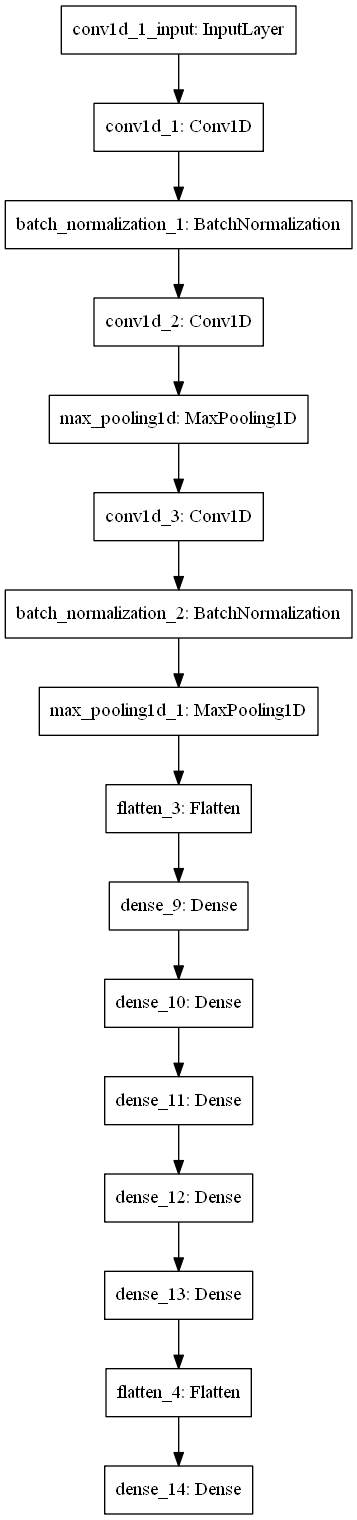

In [74]:
plot_model(CNN4, to_file='CNN4.png')

In [75]:
CNN4.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics = ['accuracy'])

In [ ]:
history4 = CNN4.fit(X_train_red, y_train_red, validation_split = 0.2, epochs = 500, batch_size = 100)

In [76]:
X_test_red = X_test_red.reshape((X_test_red.shape[0], X_test_red.shape[1], 1))

In [ ]:
y_pred2= np.argmax(CNN4.predict(X_test_red), axis = 1)

In [ ]:
y_test_red, y_test

In [ ]:
y_test_red = [np.argmax(y, axis = None) for y in y_test]
y_test_red = encoder.inverse_transform(np.array(y_test_red).ravel())

y_pred2 = encoder_red.inverse_transform(y_pred2)

In [ ]:
y_pred2

In [ ]:
print('r on test %s' % pearsonr(y_test_red, y_pred2)[0])
print('KS on test %s' % ks_2samp(y_test_red, y_pred2)[0])
print('\n')
print('RMSE test %s' % sqrt(mse(y_test_red, y_pred2)))
print('MAE test %s' % mae(y_test_red, y_pred2))

In [ ]:
df2 = pd.DataFrame()

df2['RatingPredict'] = pd.Series(y_pred2)

df2['RatingActual'] = pd.Series(y_test_red)

plt.figure(figsize = (18, 8))
plt.plot(df2['RatingPredict'].index, df2['RatingPredict'].values, label = 'Predict', linewidth = 0.8, color = '#6473E9')
plt.plot(df2['RatingActual'].index, df2['RatingActual'].values, label = 'Actual', linewidth = 0.8, color = '#B02E21')
plt.legend()
plt.ylabel('Rating')
plt.xlabel('Test obs.')
plt.savefig('ActualPredict2.png')

df2.to_csv('PredictActualCNN4.csv', index = False)

# Models after oversampling using SMOTE

### Model 3

In [77]:
from collections import Counter
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [78]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42, stratify=y_dumm_red)

In [79]:
X_train_red.shape, y_train_red.shape

((5737, 16), (5737,))

In [80]:
sm = SMOTE(random_state=50, k_neighbors = 1)
X_res, y_res = sm.fit_resample(X_train_red, y_train_red)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({31: 626, 33: 626, 30: 626, 23: 626, 35: 626, 32: 626, 27: 626, 25: 626, 28: 626, 24: 626, 29: 626, 11: 626, 26: 626, 14: 626, 20: 626, 34: 626, 10: 626, 7: 626, 16: 626, 21: 626, 37: 626, 4: 626, 22: 626, 19: 626, 12: 626, 8: 626, 17: 626, 18: 626, 36: 626, 15: 626, 9: 626, 13: 626, 5: 626, 0: 626, 1: 626, 6: 626, 2: 626, 3: 626})


In [81]:
# convert integers to dummy variables (i.e. one hot encoded)
y_res = np_utils.to_categorical(y_res)

In [82]:
X_res.shape, y_res.shape

((23788, 16), (23788, 38))

In [83]:
X_res = X_res.reshape((X_res.shape[0], X_res.shape[1], 1))

In [84]:
CNN4_over = Sequential([
    
    Conv1D(16, kernel_size = 3, activation = 'relu', input_shape = (X_res.shape[1],1), padding = 'same'), 
    BatchNormalization(),
    
    Conv1D(32, kernel_size = 5, activation = 'relu', padding = 'same'),
    MaxPool1D(pool_size = 2),
    
    
    Conv1D(128, kernel_size = 11, activation = 'relu', padding = 'same'),
    BatchNormalization(),
    
    MaxPool1D(pool_size = 2),
    
    
    Flatten(),
    
    Dense(128, activation = 'relu'),
    
    Dense(256, activation = 'relu'),
    
    Dense(128, activation = 'relu'),
    
    Dense(64, activation = 'relu'),
        
    Dense(40, activation = 'relu'),
    
    #Dense(8, activation = 'relu'),
    Flatten(),
        
    Dense(y_res.shape[1], activation = 'softmax')
    
])

In [85]:
CNN4_over.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 16, 16)            64        
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16)            64        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 16, 32)            2592      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 8, 128)            45184     
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 4, 128)           

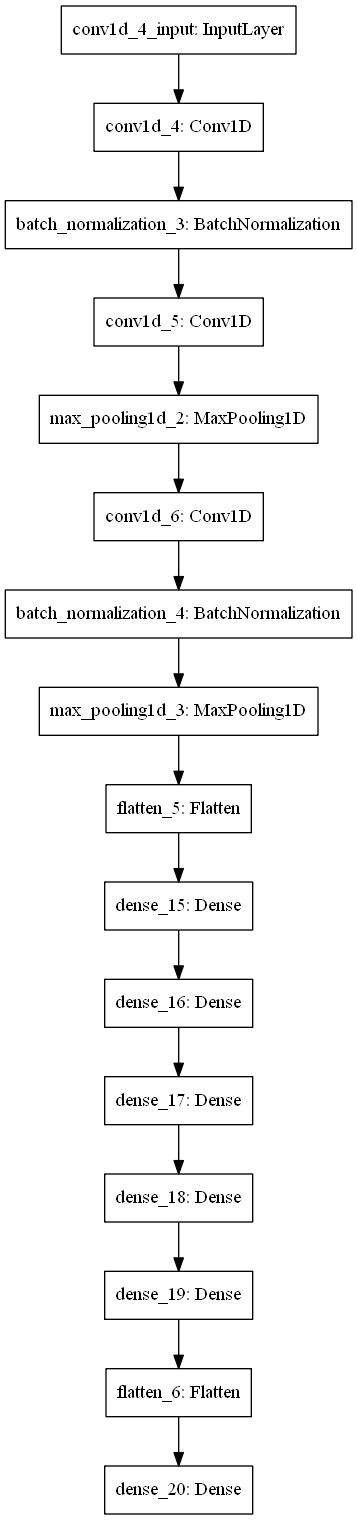

In [86]:
plot_model(CNN4_over, to_file='CNN4_over.png')

In [87]:
CNN4_over.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics = ['accuracy'])

In [ ]:
history4_over = CNN4_over.fit(X_res, y_res, validation_split = 0.3, epochs = 500, batch_size = 100)

In [88]:
X_test_red = X_test_red.reshape((X_test_red.shape[0], X_test_red.shape[1], 1))

In [ ]:
y_pred3= np.argmax(CNN4_over.predict(X_test_red), axis = 1)
y_pred3_train = np.argmax(CNN4_over.predict(X_res), axis = 1)

In [ ]:
y_test, y_test_red

In [ ]:
y_test_red = [np.argmax(y, axis = None) for y in y_test]
y_test_red = encoder.inverse_transform(np.array(y_test_red).ravel())

y_pred3 = encoder_red.inverse_transform(y_pred3)

In [ ]:
y_pred3

In [ ]:
print('r on test %s' % pearsonr(y_test_red, y_pred3)[0])
print('KS on test %s' % ks_2samp(y_test_red, y_pred3)[0])
print('\n')
print('RMSE test %s' % sqrt(mse(y_test_red, y_pred3)))
print('MAE test %s' % mae(y_test_red, y_pred3))

In [ ]:
df3 = pd.DataFrame()

df3['RatingPredict'] = pd.Series(y_pred3)

df3['RatingActual'] = pd.Series(y_test_red)

plt.figure(figsize = (18, 8))
plt.plot(df3['RatingPredict'].index, df3['RatingPredict'].values, label = 'Predict', linewidth = 0.8, color = '#6473E9')
plt.plot(df3['RatingActual'].index, df3['RatingActual'].values, label = 'Actual', linewidth = 0.8, color = '#B02E21')
plt.legend()
plt.ylabel('Rating')
plt.xlabel('Test obs.')
plt.savefig('ActualPredict3.png')

df3.to_csv('PredictActual3.csv', index = False)

### Model 4

In [89]:
class_name = 'Rating'
attributes = [col for col in apps_red.columns if col != class_name]
X_red = apps_red[attributes].values
y_red = apps_red[class_name]

In [90]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_red)
y_red = encoder.transform(y_red)

In [91]:
apps.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating',
       'Current Ver', 'Android Ver', 'Main_Genres', 'Secondary_Genres',
       'Is_Family', 'Is_Game', 'Compatibility', 'RTR', 'Both_Stores',
       'SentimentPolarityMean', 'YearUpdated', 'MonthUpdated', 'DayUpdated'],
      dtype='object')

In [92]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42, stratify=y_dumm_red)

In [93]:
X_train_red.shape, y_train_red.shape

((5737, 16), (5737,))

In [94]:
cat_df = apps[['Rating', 'Secondary_Genres', 'Main_Genres', 'Current Ver', 'Android Ver',
                   'Is_Family', 'Is_Game', 'Both_Stores', 'Content Rating']]
ord_df = apps[['Rating', 'Installs', 'Compatibility', 'YearUpdated', 'MonthUpdated']]
num_df = apps[['Rating', 'RTR', 'Size', 'Reviews', 'SentimentPolarityMean']]

In [95]:
class_name = 'Rating'
attributes = [col for col in ord_df.columns if col != class_name]
X_ord = ord_df[attributes].values
y_ord = ord_df[class_name]

# encode class values as integers
encoder_ord = LabelEncoder()
encoder_ord.fit(y_ord)
y_ord = encoder_ord.transform(y_ord)

Xord_train, Xord_test, yord_train, yord_test = train_test_split(X_ord, y_ord, test_size=0.3, random_state=42, stratify=y_ord)

In [96]:
sm_ord = SMOTE(random_state=50, k_neighbors = 1)
X_ord, y_ord = sm.fit_resample(Xord_train, yord_train)
print('Resampled dataset shape %s' % Counter(y_ord))

Resampled dataset shape Counter({27: 626, 35: 626, 23: 626, 29: 626, 16: 626, 31: 626, 34: 626, 32: 626, 28: 626, 25: 626, 33: 626, 36: 626, 30: 626, 26: 626, 37: 626, 20: 626, 18: 626, 24: 626, 21: 626, 7: 626, 15: 626, 12: 626, 19: 626, 6: 626, 22: 626, 17: 626, 8: 626, 14: 626, 11: 626, 10: 626, 0: 626, 9: 626, 13: 626, 3: 626, 5: 626, 4: 626, 2: 626, 1: 626})


In [97]:
# convert integers to dummy variables (i.e. one hot encoded)
y_ord = np_utils.to_categorical(y_ord)

In [98]:
n_features_ord = X_ord.shape[1]
n_train_example_ord = X_ord.shape[0]
n_test_example_ord = Xord_test.shape[0]

print('Number of features: ', n_features_ord)
print('Number of train example: ', n_train_example_ord)
print('Number of test example: ', n_test_example_ord)

Number of features:  4
Number of train example:  23788
Number of test example:  2459


In [99]:
class_name = 'Rating'
attributes = [col for col in cat_df.columns if col != class_name]
X_cat = cat_df[attributes].values
y_cat = cat_df[class_name]

# encode class values as integers
encoder_cat = LabelEncoder()
encoder_cat.fit(y_cat)
y_cat = encoder_cat.transform(y_cat)

Xcat_train, Xcat_test, ycat_train, ycat_test = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42, stratify=y_cat)

In [100]:
sm_cat = SMOTE(random_state=50, k_neighbors = 1)
X_cat, y_cat = sm.fit_resample(Xcat_train, ycat_train)
print('Resampled dataset shape %s' % Counter(y_cat))

Resampled dataset shape Counter({27: 626, 35: 626, 23: 626, 29: 626, 16: 626, 31: 626, 34: 626, 32: 626, 28: 626, 25: 626, 33: 626, 36: 626, 30: 626, 26: 626, 37: 626, 20: 626, 18: 626, 24: 626, 21: 626, 7: 626, 15: 626, 12: 626, 19: 626, 6: 626, 22: 626, 17: 626, 8: 626, 14: 626, 11: 626, 10: 626, 0: 626, 9: 626, 13: 626, 3: 626, 5: 626, 4: 626, 2: 626, 1: 626})


In [101]:
# convert integers to dummy variables (i.e. one hot encoded)
y_cat = np_utils.to_categorical(y_cat)

In [102]:
n_features_cat = X_cat.shape[1]
n_train_example_cat = X_cat.shape[0]
n_test_example_cat = Xcat_test.shape[0]

print('Number of features: ', n_features_cat)
print('Number of train example: ', n_train_example_cat)
print('Number of test example: ', n_test_example_cat)

Number of features:  8
Number of train example:  23788
Number of test example:  2459


In [103]:
class_name = 'Rating'
attributes = [col for col in num_df.columns if col != class_name]
X_num = num_df[attributes].values
y_num = num_df[class_name]

# encode class values as integers
encoder_num = LabelEncoder()
encoder_num.fit(y_num)
y_num = encoder_num.transform(y_num)

Xnum_train, Xnum_test, ynum_train, ynum_test = train_test_split(X_num, y_num, test_size=0.3, random_state=42, stratify=y_num)

In [104]:
sm_num = SMOTE(random_state=50, k_neighbors = 1)
X_num, y_num = sm.fit_resample(Xnum_train, ynum_train)
print('Resampled dataset shape %s' % Counter(y_num))

Resampled dataset shape Counter({27: 626, 35: 626, 23: 626, 29: 626, 16: 626, 31: 626, 34: 626, 32: 626, 28: 626, 25: 626, 33: 626, 36: 626, 30: 626, 26: 626, 37: 626, 20: 626, 18: 626, 24: 626, 21: 626, 7: 626, 15: 626, 12: 626, 19: 626, 6: 626, 22: 626, 17: 626, 8: 626, 14: 626, 11: 626, 10: 626, 0: 626, 9: 626, 13: 626, 3: 626, 5: 626, 4: 626, 2: 626, 1: 626})


In [105]:
# convert integers to dummy variables (i.e. one hot encoded)
y_num = np_utils.to_categorical(y_num)

In [106]:
n_features_num = X_num.shape[1]
n_train_example_num = X_num.shape[0]
n_test_example_num = Xnum_test.shape[0]

print('Number of features: ', n_features_num)
print('Number of train example: ', n_train_example_num)
print('Number of test example: ', n_test_example_num)

Number of features:  4
Number of train example:  23788
Number of test example:  2459


In [107]:
#set the iput layers for NN
input_ord = Input(shape=(n_features_ord,1))
input_cat = Input(shape=(n_features_cat,1))
input_num = Input(shape=(n_features_num,1))

input_ord.shape, input_cat.shape, input_num.shape

(TensorShape([None, 4, 1]),
 TensorShape([None, 8, 1]),
 TensorShape([None, 4, 1]))

In [108]:
#the first branch
conv1 = Conv1D(128, kernel_size = 4, activation = 'relu', padding = "same")(input_ord)
batch1 = BatchNormalization()(conv1)
conv1 = Conv1D(256, kernel_size = 2, activation = 'relu', padding = "same")(conv1)
batch1 = BatchNormalization()(conv1)
pool1 = MaxPool1D()(batch1)
flat1 = Flatten()(pool1)
dense1 = Dense(128, activation = 'relu')(flat1)
x_ord = Model(inputs=input_ord, outputs=dense1)

#the second branch
conv2 = Conv1D(96, kernel_size=4, activation='relu', padding = "same")(input_cat)
#batch2 = BatchNormalization()(conv2)
conv2 = Conv1D(192, kernel_size=3, activation='relu', padding = "same")(conv2)
batch2 = BatchNormalization()(conv2)
pool2 = MaxPool1D()(batch2)
flat2 = Flatten()(pool2)
dense2 = Dense(128, activation = 'relu')(flat2)
x_cat = Model(inputs=input_cat, outputs=dense2)

#the third branch
conv3 = Conv1D(96, kernel_size=4, activation='relu', padding = "same")(input_num)
#batch2 = BatchNormalization()(conv2)
conv3 = Conv1D(192, kernel_size=3, activation='relu', padding = "same")(conv3)
batch3 = BatchNormalization()(conv3)
pool3 = MaxPool1D()(batch3)
flat3 = Flatten()(pool3)
dense3 = Dense(128, activation = 'relu')(flat3)
x_num = Model(inputs=input_num, outputs=dense3)

In [109]:
# combine the output of the three branches
merge = concatenate([dense1, dense2, dense3])

dense1.shape, dense2.shape, dense3.shape

(TensorShape([None, 128]), TensorShape([None, 128]), TensorShape([None, 128]))

In [110]:
# apply a FC layer and then a prediction on the
# combined outputs
z = Dense(64, activation="relu")(merge)
z = Dense(40, activation="relu")(merge)
z = Dense(y_ord.shape[1], activation="softmax")(z)

In [111]:
y_ord.shape[1]

38

In [112]:
# our model will accept the inputs of the three branches and
# then output a single value
model4 = Model(inputs=[x_ord.input, x_cat.input, x_num.input], outputs=z)

print(model4.summary())

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 8, 1)]       0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 4, 1)]       0                                            
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 4, 128)       640         input_4[0][0]                    
______________________________________________________________________________________

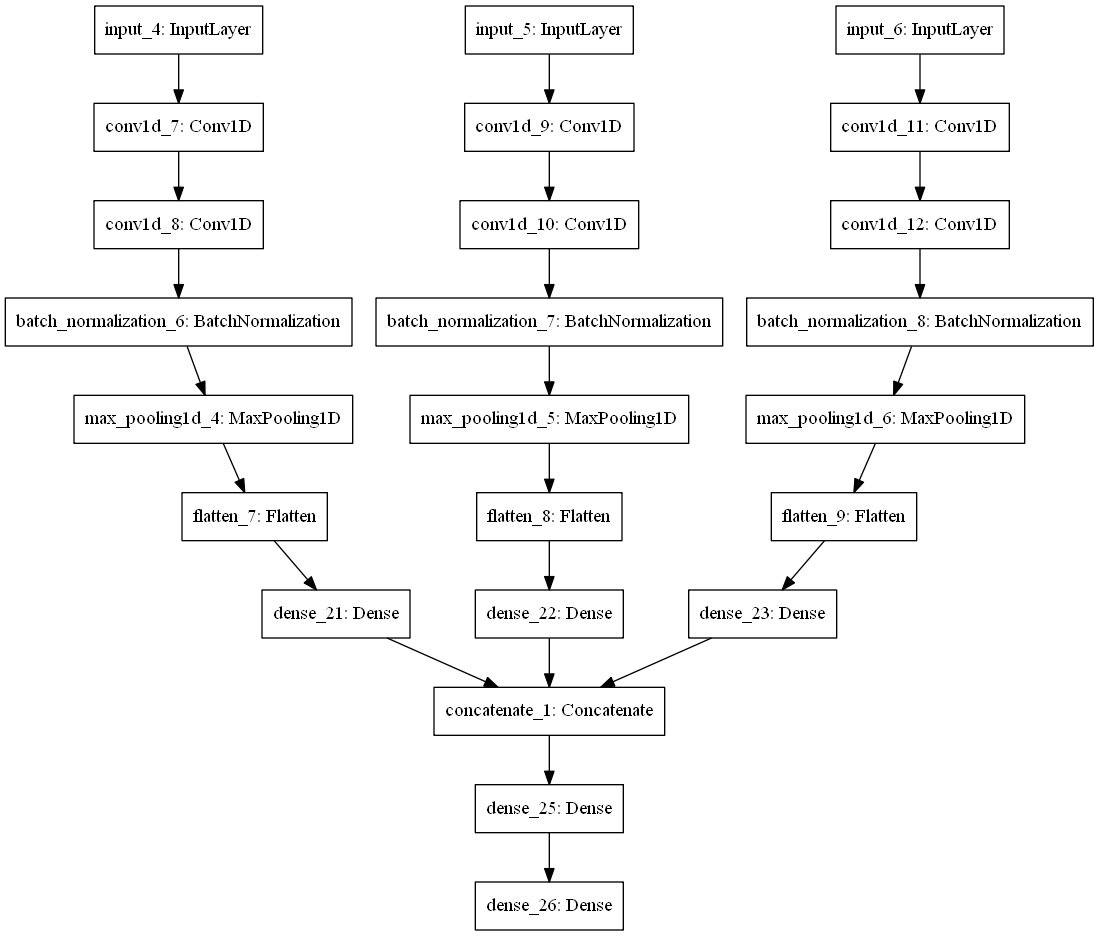

In [113]:
plot_model(model4, to_file='model4.png')

In [114]:
y_ord.shape, y_test.shape

((23788, 38), (2459, 38))

In [ ]:
model4.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics = ['accuracy'])

history4_2 = model4.fit([Xord_train, Xcat_train, Xnum_train], y_ord, validation_split = 0.4, epochs = 500, batch_size = 100)

In [ ]:
y_pred4= np.argmax(model4.predict([Xord_test, Xcat_test, Xnum_test]), axis = 1)
y_pred4_train = np.argmax(model4.predict([Xord_train, Xcat_train, Xnum_train]), axis = 1)

In [ ]:
y_test

In [ ]:
y_test_red = [np.argmax(y, axis = None) for y in y_test]
y_test_red = encoder.inverse_transform(np.array(y_test_red).ravel())

y_pred4 = encoder_red.inverse_transform(y_pred4)

In [ ]:
print('r on test %s' % pearsonr(y_test_red, y_pred4)[0])
print('KS on test %s' % ks_2samp(y_test_red, y_pred4)[0])
print('\n')
print('RMSE test %s' % sqrt(mse(y_test_red, y_pred4)))
print('MAE test %s' % mae(y_test_red, y_pred3))

In [ ]:
df4 = pd.DataFrame()

df4['RatingPredict'] = pd.Series(y_pred4)

df4['RatingActual'] = pd.Series(y_test_red)

plt.figure(figsize = (18, 8))
plt.plot(df4['RatingPredict'].index, df4['RatingPredict'].values, label = 'Predict', linewidth = 0.8, color = '#6473E9')
plt.plot(df4['RatingActual'].index, df4['RatingActual'].values, label = 'Actual', linewidth = 0.8, color = '#B02E21')
plt.legend()
plt.ylabel('Rating')
plt.xlabel('Test obs.')
plt.savefig('ActualPredict4.png')

df4.to_csv('PredictActual4.csv', index = False)